In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib
import pyabf 
import seaborn as sns
sns.set_context('poster')
import os
from scipy import stats



In [27]:
sEPSC_ntsr1_freq = {
        'Cell_ID': ['M1_C1', 'M1_C2', 'M1_C3', 'M2_C1', 'M2_C2', 'M2_C3', 'M6_C1', 'M6_C2', 'M6_C3'],
        'Animal': ['M1', 'M1', 'M1', 'M2', 'M2', 'M2', 'M6', 'M6', 'M6'],
        'Baseline_Frequency': [1.8677, 0.575, 1.0208, 0.5641, 1.2033, 0.9186, 3.4255, 1.7464, 1.0217],
        'NA_Frequency': [0.9283, 0.1662, 0.9855, 0.3319, 1.3427, 0.3547, 0.3552, 0.5639, 0.4719]
    }
    
sEPSC_ntsr1_ampl = {
        'Cell_ID': ['M1_C1', 'M1_C2', 'M1_C3', 'M2_C1', 'M2_C2', 'M2_C3', 'M6_C1', 'M6_C2', 'M6_C3'],
        'Animal': ['M1', 'M1', 'M1', 'M2', 'M2', 'M2', 'M6', 'M6', 'M6'],
        'Baseline_Amplitude': [7.5706, 6.7139, 6.1536, 5.188, 6.499, 4.9682, 7.8805, 6.1763, 4.6996],
        'NA_Amplitude': [7.8184, 7.0626, 6.8185, 5.2362, 5.7827 , 5.7086, 5.3993, 5.5099, 6.0505]
    }

sIPSC_ntsr1_freq = {
        'Cell_ID': ['M3_C1', 'M3_C2', 'M3_C3', 'M4_C1', 'M4_C2', 'M4_C3', 'M5_C1', 'M5_C2', 'M5_C3'],
        'Animal': ['M3', 'M3', 'M3', 'M4', 'M4', 'M4', 'M5', 'M5', 'M5'],
        'Baseline_Frequency': [1.1462, 0.563, 2.7665, 2.1435,0.3021,0.7454,0.8081,3.221020878,2.7158],
        'NA_Frequency': [13.281,5.2162,5.0844,2.5665,2.378,8.9352,2.4505,14.592,6.5217]
    }

sIPSC_ntsr1_ampl = {
        'Cell_ID': ['M3_C1', 'M3_C2', 'M3_C3', 'M4_C1', 'M4_C2', 'M4_C3', 'M5_C1', 'M5_C2', 'M5_C3'],
        'Animal': ['M3', 'M3', 'M3', 'M4', 'M4', 'M4', 'M5', 'M5', 'M5'],
        'Baseline_Amplitude': [10.198,6.7138,7.0191,7.4348,5.0756,12.802,5.9815,7.559096154,9.455],
        'NA_Amplitude': [7.8551,6.8923,8.0405,6.6456,8.4617,11.353,6.3087,13.425,7.3418]
    }


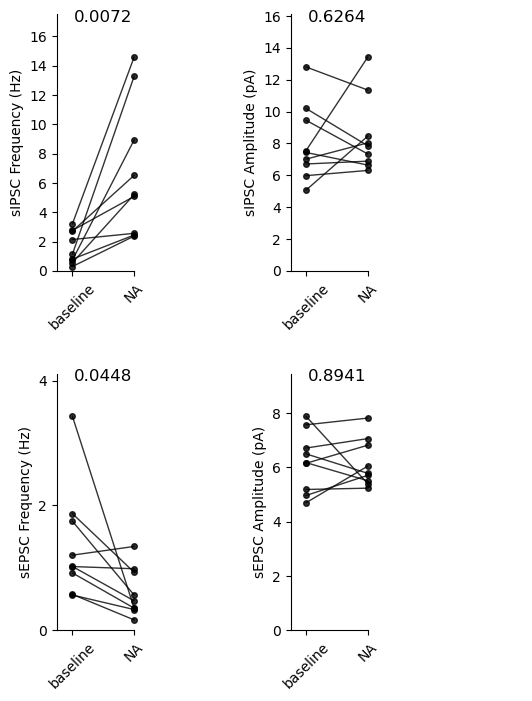

In [ ]:

def plot_epsc_ipsc():
    # Create DataFrames
    df_sEPSC_freq = pd.DataFrame(sEPSC_ntsr1_freq)
    df_sEPSC_ampl = pd.DataFrame(sEPSC_ntsr1_ampl)
    df_sIPSC_freq = pd.DataFrame(sIPSC_ntsr1_freq)
    df_sIPSC_ampl = pd.DataFrame(sIPSC_ntsr1_ampl)
    
    # Create 2x2 plot
    fig, axes = plt.subplots(2, 2, figsize=(6, 8))
    plt.subplots_adjust(wspace=0.01, hspace=0.4)

    # Color scheme matching the other script
    colors = ['lightgrey', 'lightcoral']  # baseline, NA
    colors_bar = ["#908E8E", "#EB6F6F"]  # baseline, NA
    conditions = ['baseline', 'NA']
    
    datasets = [
        (df_sIPSC_freq, 'Baseline_Frequency', 'NA_Frequency', 'sIPSC Frequency (Hz)', axes[0,0]),
        (df_sIPSC_ampl, 'Baseline_Amplitude', 'NA_Amplitude', 'sIPSC Amplitude (pA)', axes[0,1]),
        (df_sEPSC_freq, 'Baseline_Frequency', 'NA_Frequency', 'sEPSC Frequency (Hz)', axes[1,0]),
        (df_sEPSC_ampl, 'Baseline_Amplitude', 'NA_Amplitude', 'sEPSC Amplitude (pA)', axes[1,1])
    ]
    
    for df, baseline_col, na_col, ylabel, ax in datasets:
        # Plot connected dots
        for _, row in df.iterrows():
            ax.plot([0, 1], [row[baseline_col], row[na_col]], 
                   'o-', color='black', markersize=4, linewidth=1, alpha=0.8)
        
        # Calculate and display p-value
        t_stat, p_val = stats.ttest_rel(df[baseline_col], df[na_col])
        max_y = max(df[baseline_col].max(), df[na_col].max())
        ax.text(0.5, max_y + (max_y * 0.15), f'{p_val:.4f}', 
                ha='center', va='bottom', fontsize=12)
        
        # Format axes
        ax.set_ylabel(ylabel)
        ax.set_xticks([0, 1])
        ax.set_xticklabels(['baseline', 'NA'], rotation=45)
        
        # Set tight x-axis limits that match the data points
        ax.set_xlim(-0.25, 3.5)
        
        # Set y-axis limit with space for p-value
        ax.set_ylim(0, max_y + (max_y * 0.2))

        # Set y-axis ticks every 5 units
        ax.yaxis.set_major_locator(MultipleLocator(2))
        
        # Remove top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        # Adjust spine lengths to match x-axis limits
        ax.spines['bottom'].set_bounds(-0.25, 1)
        ax.spines['left'].set_bounds(0, ax.get_ylim()[1])
    
    plt.show()

# Run the function
plot_epsc_ipsc()

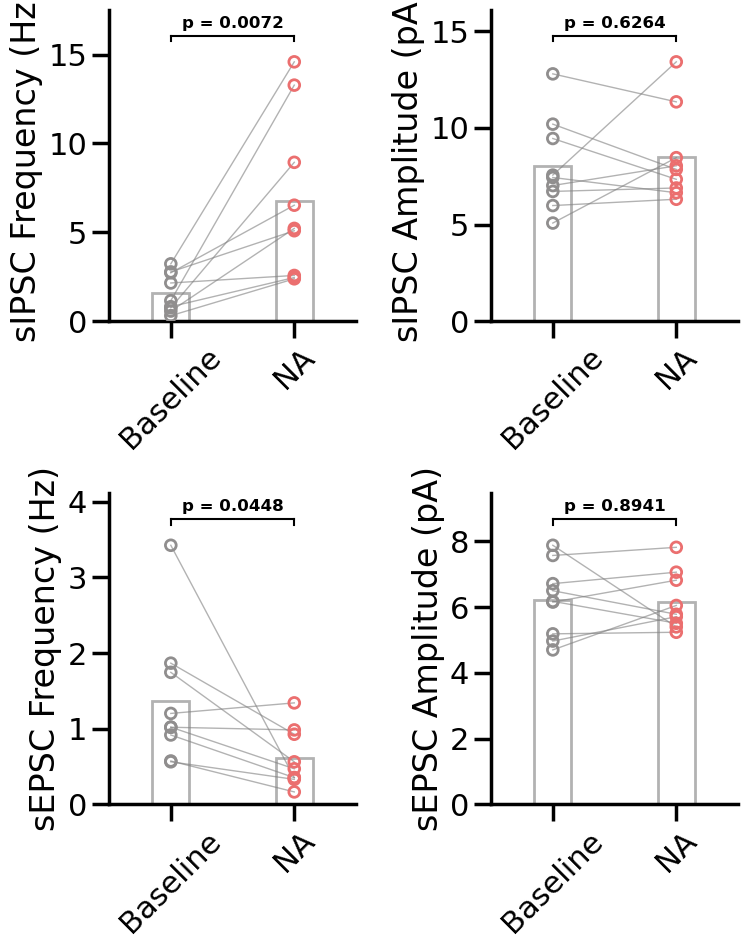

In [77]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib
import pyabf 
import seaborn as sns
sns.set_context('poster')
import os
from scipy import stats

def plot_epsc_ipsc():
    # Create DataFrames
    df_sEPSC_freq = pd.DataFrame(sEPSC_ntsr1_freq)
    df_sEPSC_ampl = pd.DataFrame(sEPSC_ntsr1_ampl)
    df_sIPSC_freq = pd.DataFrame(sIPSC_ntsr1_freq)
    df_sIPSC_ampl = pd.DataFrame(sIPSC_ntsr1_ampl)
    
    # Create 2x2 plot
    fig, axes = plt.subplots(2, 2, figsize=(8, 10))
    plt.subplots_adjust(wspace=0.3, hspace=0.4)
    
    # Your exact color scheme (for circle outlines)
    colors_outline = ["#908E8E", "#EB6F6F"]  # baseline, NA
    conditions = ['Baseline', 'NA']
    
    datasets = [
        (df_sIPSC_freq, 'Baseline_Frequency', 'NA_Frequency', 'sIPSC Frequency (Hz)', axes[0,0]),
        (df_sIPSC_ampl, 'Baseline_Amplitude', 'NA_Amplitude', 'sIPSC Amplitude (pA)', axes[0,1]),
        (df_sEPSC_freq, 'Baseline_Frequency', 'NA_Frequency', 'sEPSC Frequency (Hz)', axes[1,0]),
        (df_sEPSC_ampl, 'Baseline_Amplitude', 'NA_Amplitude', 'sEPSC Amplitude (pA)', axes[1,1])
    ]
    
    for df, baseline_col, na_col, ylabel, ax in datasets:
        # Calculate means and standard deviations
        baseline_mean = df[baseline_col].mean()
        na_mean = df[na_col].mean()

        
        means = [baseline_mean, na_mean]
        # Create outlined bar plot
        bars = ax.bar(range(len(conditions)), means, 
                     width=0.3, 
                     fill=False,  # No fill
                     edgecolor='gray',
                     linewidth=2,
                     alpha=0.6)
        
        
        # Plot individual data points with colored outlines (not filled)
        for _, row in df.iterrows():
            y_vals = [row[baseline_col], row[na_col]]
            x_vals = [0, 1]
            
            # Connect points with line
            ax.plot(x_vals, y_vals, color='gray', alpha=0.6, linewidth=1, zorder=1)
            
            # Plot circles with colored outlines
            for i, (x, y) in enumerate(zip(x_vals, y_vals)):
                ax.scatter(x, y, s=60, facecolors='none',  # No fill
                          edgecolors=colors_outline[i], 
                          linewidths=2, zorder=3)
        
        # Calculate p-value
        t_stat, p_val = stats.ttest_rel(df[baseline_col], df[na_col])
        max_y = max(df[baseline_col].max(), df[na_col].max())
        
        # Add significance line and p-value
        line_y = max_y + max_y * 0.1
        ax.plot([0, 1], [line_y, line_y], color='black', linewidth=1.5)
        ax.plot([0, 0], [line_y - max_y * 0.02, line_y], color='black', linewidth=1.5)
        ax.plot([1, 1], [line_y - max_y * 0.02, line_y], color='black', linewidth=1.5)
        
        ax.text(0.5, line_y + max_y * 0.02, f'p = {p_val:.4f}', 
                ha='center', va='bottom', fontsize=12, fontweight='bold')
        
        # Format axes
        ax.set_ylabel(ylabel)
        ax.set_xticks(range(len(conditions)))
        ax.set_xticklabels(conditions, rotation=45)
        ax.set_xlim(-0.5, len(conditions) - 0.5)
        ax.set_ylim(0, max_y + max_y * 0.2)
        
        # Remove top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Run the function
plot_epsc_ipsc()

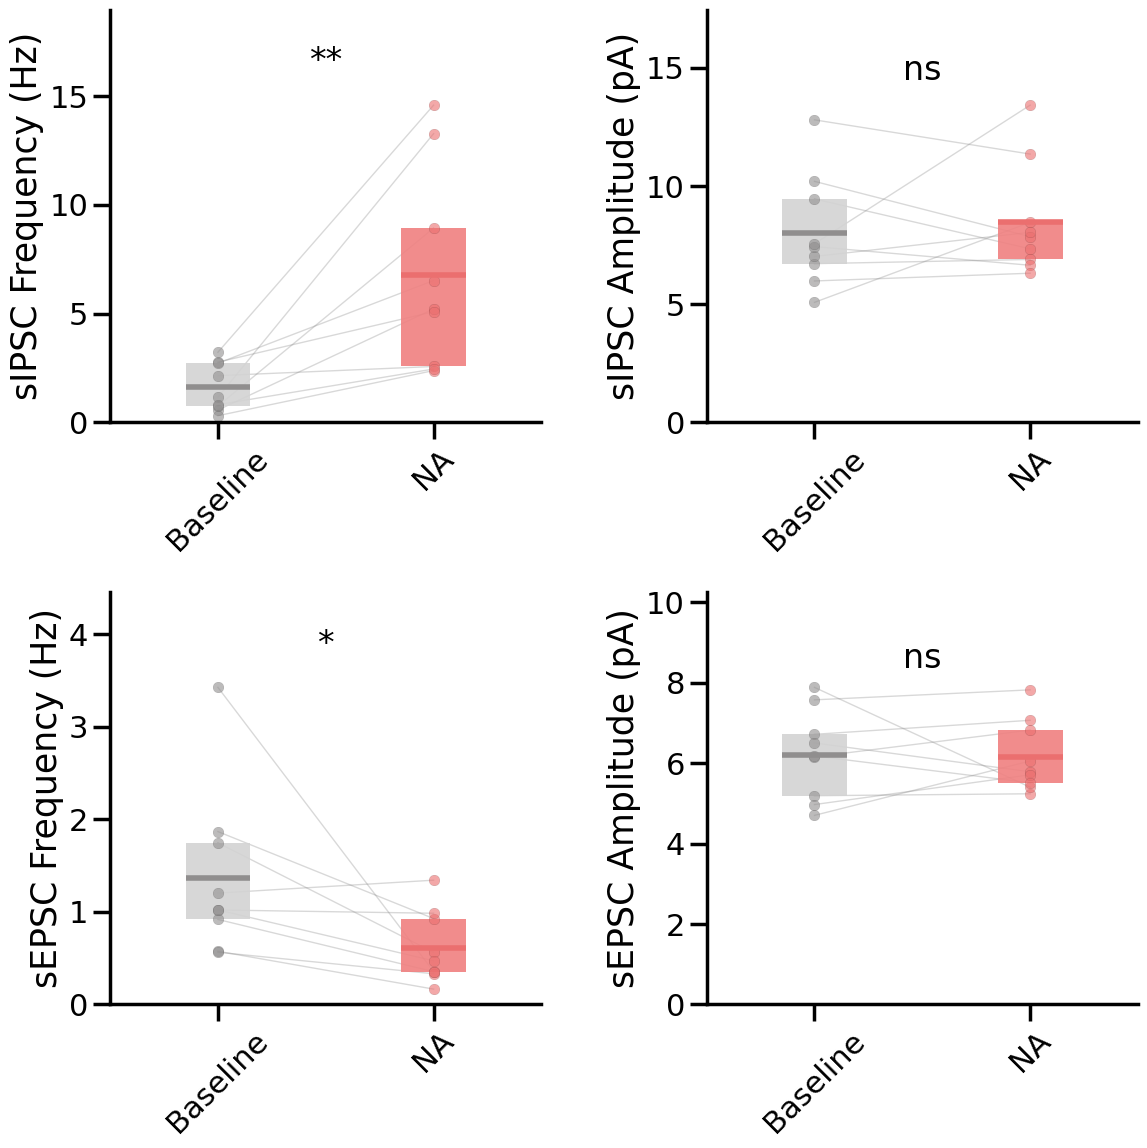

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib
import pyabf 
import seaborn as sns
sns.set_context('poster')
import os
from scipy import stats
from statannotations.Annotator import Annotator

def plot_epsc_ipsc():
    # Create DataFrames
    df_sEPSC_freq = pd.DataFrame(sEPSC_ntsr1_freq)
    df_sEPSC_ampl = pd.DataFrame(sEPSC_ntsr1_ampl)
    df_sIPSC_freq = pd.DataFrame(sIPSC_ntsr1_freq)
    df_sIPSC_ampl = pd.DataFrame(sIPSC_ntsr1_ampl)
    
    # Create 2x2 plot
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    plt.subplots_adjust(wspace=0.3, hspace=0.)
    
    # Your exact color scheme
    colors = ['lightgrey', 'lightcoral']  # baseline, NA
    colors_bar = ["#908E8E", "#EB6F6F"]  # baseline, NA
    conditions = ['baseline', 'NA']
    
    datasets = [
        (df_sIPSC_freq, 'Baseline_Frequency', 'NA_Frequency', 'sIPSC Frequency (Hz)', axes[0,0]),
        (df_sIPSC_ampl, 'Baseline_Amplitude', 'NA_Amplitude', 'sIPSC Amplitude (pA)', axes[0,1]),
        (df_sEPSC_freq, 'Baseline_Frequency', 'NA_Frequency', 'sEPSC Frequency (Hz)', axes[1,0]),
        (df_sEPSC_ampl, 'Baseline_Amplitude', 'NA_Amplitude', 'sEPSC Amplitude (pA)', axes[1,1])
    ]
    
    for df, baseline_col, na_col, ylabel, ax in datasets:
        box_data = [df[baseline_col].values, df[na_col].values]
        
        # Plot boxplots with your color scheme
        box = ax.boxplot(
            box_data,
            positions=range(len(conditions)),
            widths=0.3,
            patch_artist=True,
            showfliers=False,
            medianprops=dict(color='none'),
            boxprops=dict(facecolor='none', edgecolor='none'),
            whiskerprops=dict(color='none'),
            capprops=dict(color='none')
        )
        
        for patch, color in zip(box['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.9)
        
        # Plot connected lines and points
        for _, row in df.iterrows():
            y = [row[baseline_col], row[na_col]]
            x = [0, 1]
            
            # Connect points with line
            ax.plot(x, y, color='gray', alpha=0.3, linewidth=1, zorder=1)
            
            for i, (xi, yi) in enumerate(zip(x, y)):
                ax.scatter(xi, yi, color=colors_bar[i], alpha=0.6, s=60, zorder=2,
                          edgecolors='black', linewidths=0.1)
        
        # Draw mean lines
        for i, col in enumerate([baseline_col, na_col]):
            box_width = 0.3  # Same as the boxplot width
            y_vals = df[col].dropna().values
            if len(y_vals) > 0:
                ax.hlines(np.mean(y_vals),  i - box_width/2, i + box_width/2,
                         color=colors_bar[i], linewidth=4, zorder=3)
        
        data_long = pd.DataFrame({
            'value': np.concatenate([df[baseline_col].values, df[na_col].values]),
            'group': ['Baseline'] * len(df[baseline_col]) + ['NA'] * len(df[na_col])
        })
        
        # Configure statannotations for stars only 
        pairs = [('Baseline', 'NA')]
        annotator = Annotator(ax, pairs, data=data_long, x='group', y='value')
        annotator.configure(
            test='t-test_paired', 
            text_format='star',  # Use stars instead of p-values
            loc='outside',  # Place annotations outside the plot
            verbose=False,
            line_height=0,  # Remove the bracket lines
            line_width=0    # Remove the bracket lines
        )
        annotator.apply_and_annotate()
    
        # Get max_y for later axis formatting
        max_y = max(df[baseline_col].max(), df[na_col].max())
        
        # Format axes
        ax.set_ylabel(ylabel, fontsize=25)
        ax.set_xticks(range(len(conditions)))
        ax.set_xticklabels(['Baseline', 'NA'], rotation=45)
        ax.set_xlim(-0.5, len(conditions) - 0.5)
        ax.set_ylim(0, max_y + (max_y * 0.3))
        
        # Remove top and right spines
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.savefig("spont_stats.pdf", dpi=300)
    plt.show()

# Run the function
plot_epsc_ipsc()